In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [83]:
temp = pd.read_csv('temp.csv')

In [84]:
temp.drop('Unnamed: 0', axis=1, inplace=True)

In [85]:
temp.rename(columns={'date': 'Date'}, inplace=True)

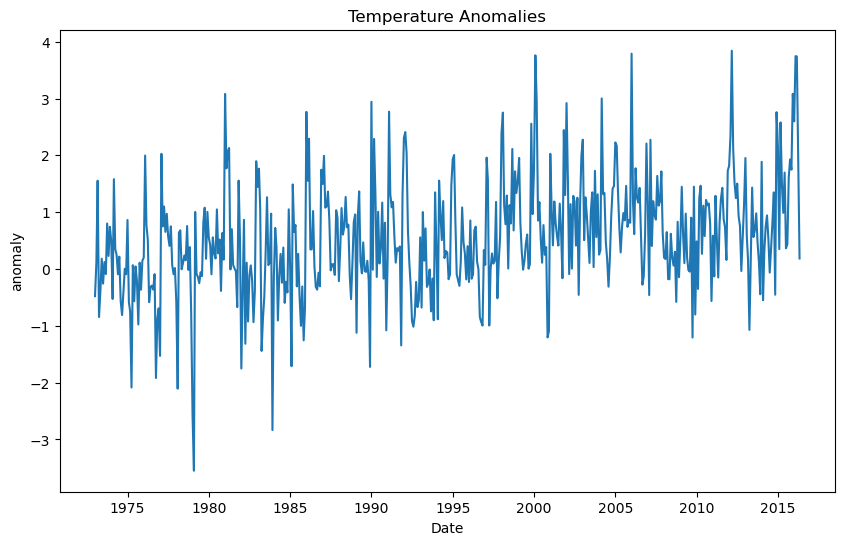

In [86]:
# plot anamolies
temp['Date'] = pd.to_datetime(temp['Date'])
temp.set_index('Date', inplace=True)
temp.sort_index(inplace=True)

# filter out dates from 1973
temp = temp[temp.index.year >= 1973]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='anomaly', data=temp)
plt.title('Temperature Anomalies')
plt.show()

In [88]:
temp['anomaly_squared'] = temp['anomaly'] ** 2

# linear regression
X = temp.index.values.astype(float).reshape(-1, 1)
y = temp['anomaly'].values

test_linear_model(X, y)

The p-value for the F-test is: nan.
The model is not statistically significant.


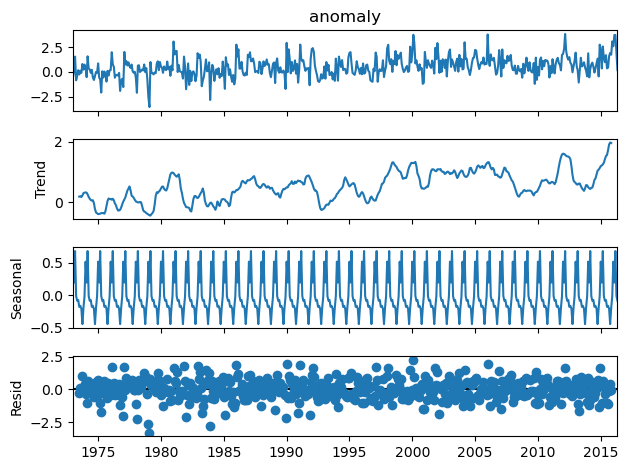

In [91]:
# seasonal decomposition for temperature
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(temp['anomaly'], model='additive', period=12)
decomposition.plot()
plt.show()

trend = decomposition.trend

In [92]:
temp_trend = pd.DataFrame(trend)

In [98]:
# make date a column
temp_trend.reset_index(inplace=True)
temp_trend.rename(columns={'trend': 'anomaly'}, inplace=True)
temp_trend.dropna(inplace=True)

The p-value for the F-test is: 5.8173092642559593e-64.
The model is statistically significant.


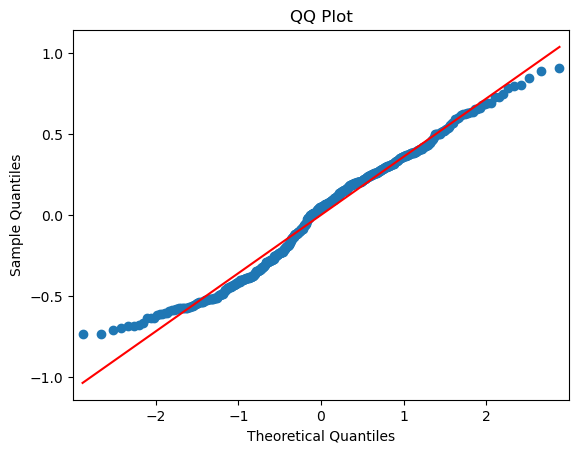

The null hypothesis for the Jarque-Bera test is normality.
{'Jarque-Bera': 14.04928945667796, 'Chi^2 two-tail prob.': 0.0008896835428148672, 'Skew': -0.006733936710959756, 'Kurtosis': 2.1862060731341715}


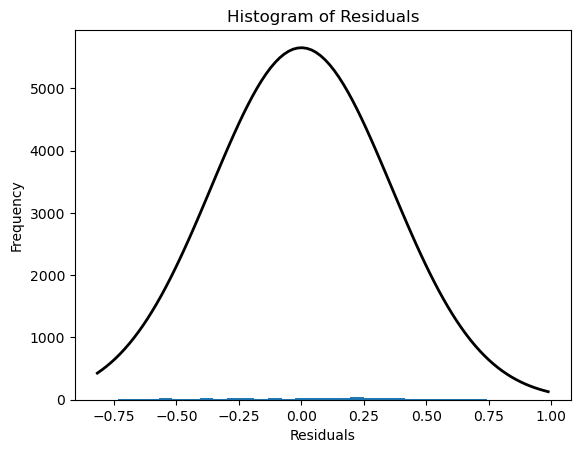

The residuals are not normally distributed.
The null hypothesis for the Breusch-Pagan test is homoscedasticity.
{'Lagrange multiplier statistic': 19.616034868057, 'p-value': 9.467132683014396e-06, 'f-value': 20.322140459635865, 'f p-value': 8.13512960057627e-06}


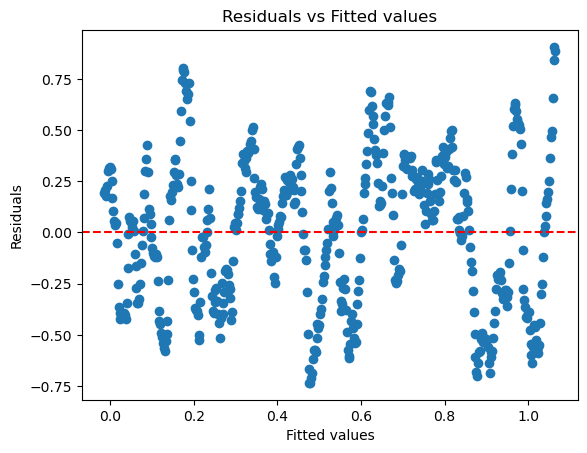

The residuals are heteroscedastic.
The null hypothesis for the Durbin-Watson test is no autocorrelation.
{'Durbin-Watson': 0.0507577077872432, 'p-value': 0.9595185917056597}


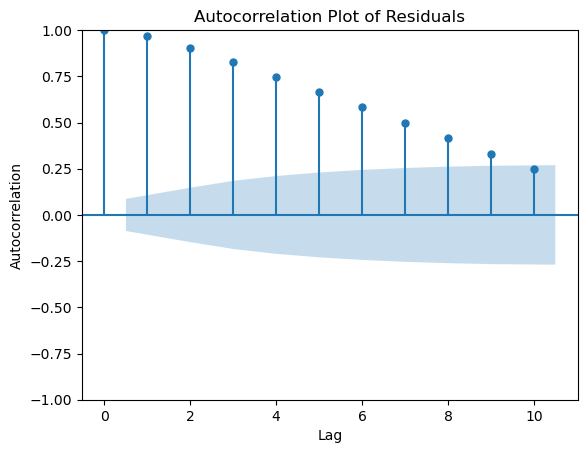

The residuals are not autocorrelated.


AttributeError: 'numpy.ndarray' object has no attribute 'corr'

In [99]:
X = temp_trend.index.values.astype(float).reshape(-1, 1)
y = temp_trend['anomaly'].values
test_linear_model(X, y)

In [64]:
emi_com = pd.read_csv('emission_consumption.csv')
emi_com.head()
emi_com['Date'] = pd.to_datetime(emi_com['Date'])

In [65]:
# inner join temp and emi_com on date
df = pd.merge(temp_trend, emi_com, on='Date', how='inner')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19031 entries, 0 to 19030
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   level_0                   19031 non-null  int64         
 1   index                     19031 non-null  int64         
 2   Date                      19031 non-null  datetime64[ns]
 3   anomaly                   19031 non-null  float64       
 4   EIA_ID                    19031 non-null  object        
 5   Consumption (kBarrel)     19031 non-null  float64       
 6   Column_Order_x            19031 non-null  int64         
 7   Energy Type               19031 non-null  object        
 8   Energy Class              19031 non-null  object        
 9   Sector                    19031 non-null  object        
 10  Emission (Mton Co2)       19031 non-null  float64       
 11  Column_Order_y            19031 non-null  int64         
 12  Emission per Consu

Text(0.5, 1.0, 'Temperature vs Emission by Petroleum in January')

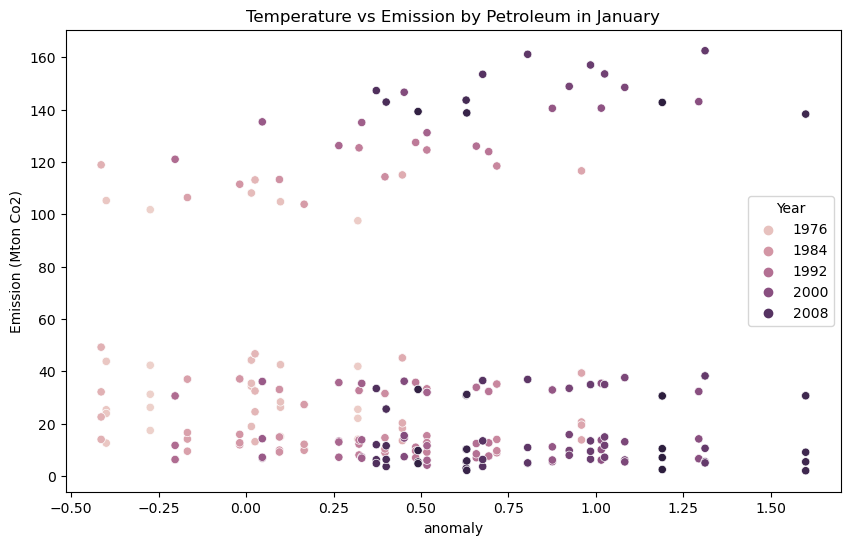

In [66]:
# plot temperature vs emission by petroleum in january

petroleum = df[df['Energy Class'] == 'Petroleum']
petroleum = petroleum[petroleum['Energy Type'] == 'Total']
petroleum['Month'] = pd.DatetimeIndex(petroleum['Date']).month_name()
petroleum = petroleum[petroleum['Month'] == 'January']
petroleum['Year'] = pd.DatetimeIndex(petroleum['Date']).year

plt.figure(figsize=(10, 6))
sns.scatterplot(x='anomaly', y='Emission (Mton Co2)', data=petroleum, hue='Year')
plt.title('Temperature vs Emission by Petroleum in January')

In [67]:
petroleum

,level_0,index,Date,anomaly,EIA_ID,Consumption (kBarrel),Column_Order_x,Energy Type,Energy Class,Sector,Emission (Mton Co2),Column_Order_y,Emission per Consumption,Month,Year
4,1470,1470,1973-01-01,-0.274042,PAACPUS,8508.201,9,Total,Petroleum,Transportation,101.775,10,0.011962,January,1973
18,1470,1470,1973-01-01,-0.274042,PAICPUS,4381.954,13,Total,Petroleum,Industrial,42.325,12,0.009659,January,1973
19,1470,1470,1973-01-01,-0.274042,HLICPUS,1029.905,6,Total,Petroleum,Industrial,42.325,12,0.041096,January,1973
21,1470,1470,1973-01-01,-0.274042,PACCPUS,1329.395,11,Total,Petroleum,Commercial,17.412,9,0.013098,January,1973
28,1470,1470,1973-01-01,-0.274042,PARCPUS,2686.283,4,Total,Petroleum,Residential,31.236,6,0.011628,January,1973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18630,1974,1974,2015-01-01,1.189583,PAACPUS,12735.088,9,Total,Petroleum,Transportation,142.755,10,0.011210,January,2015
18643,1974,1974,2015-01-01,1.189583,PAEIZUS,158.763,13,Total,Petroleum,Electric Power,2.480,6,0.015621,January,2015
18651,1974,1974,2015-01-01,1.189583,PAICPUS,4659.386,13,Total,Petroleum,Industrial,30.603,12,0.006568,January,2015
18657,1974,1974,2015-01-01,1.189583,PARCPUS,1067.448,4,Total,Petroleum,Residential,10.456,6,0.009795,January,2015


In [25]:
import sys
sys.path.append('..')
from LinearModel import *

In [29]:
X = petroleum['Emission (Mton Co2)']
y = petroleum['anomaly']
test_linear_model(X, y)

The p-value for the F-test is: 0.7011121205884043.
The model is not statistically significant.
